In [ ]:
#### !!!! Change RUNTIME ON TOP RIGHT FROM PYTHON3 to R

Data set list

DEMO_L.xpt:
1. Maritial Status - DMDHRMAZ or DMDMARTZ<<<
2. Education Level - DMDEDUC2<<< or DMDHREDZ
3. Age in Years - DMDHRAGZ or RIDAGEYR<<<

BPXO_L.XPT
1. Systolic Blood Pressure - BPXOSY1
2. Diastolic Blood Pressure - BPXODI1

LAB NOT FOUND
1. Vitamin D lab Interpretation - NOTE: NOT IN QUESTION
2. Hepatitis B lab Antibodies - NOT IN QUESTION
3. Weak Failing Kidneys = NOT IN QUESTION

PAQ_L.xpt
1. Minutes of Sedentary Behavior - PAD680

WHQ_L.xpt
1. Current Self-repported weight - WHD020

In [ ]:
install.packages("haven")
### allow package to install before next section

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(haven)

In [ ]:
### Command for reading data SKIP THIS CODELINE
  # dataframe <-read_xpt("/content/DEMO_L.xpt")

In [ ]:
### Convert dataset into r df
xpt_bpxo_data <- read_xpt("/content/BPXO_L.xpt")
xpt_demo_data <- read_xpt("/content/DEMO_L.xpt")
xpt_paq_data <- read_xpt("/content/PAQ_L.xpt")
xpt_whq_data <- read_xpt("/content/WHQ_L.xpt")

CLEAN UP SECTION

PAD680 - Minutes sedentary activity

---
SITE: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.htm

| Code | Descript | Count |
|---|---|---|
|0 to 1380| range of values| 8065 |
|7777|Refused|6|
|9999|don't know|67|
|.| Missing|15|


In [ ]:
### cleaning data from set according to site specs :
# SITE: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.htm
paq_data_clean <-subset (xpt_paq_data, PAD680!='7777' & PAD680 != '9999' & !is.na(PAD680))

WHD020 - Current Self Reported weight (LBS)

---
site: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/WHQ_L.htm
| Code | Descript | Count |
|---|---|---|
|63 to 530| range of values| 8358 |
|7777|Refused|40|
|9999|don't know|88|
|.| Missing|15|



In [ ]:
whq_data_clean <- subset (xpt_whq_data, WHD020!= '7777' & WHD020 != '9999' & !is.na(WHD020))

DEMO DATA

---

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.htm

DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1 to 3| range of values| 7783 |
|77|Refused|4|
|99|don't know|5|
|.| Missing|4141|

DMDEDUC2 - education level
| Code | Descript | Count |
|---|---|---|
|1-5| range of values| 7783 |
|7|Refused|0|
|9|don't know|11|
|.| Missing|4139|

RIDAGEYR - Age in Years
| Code | Descript | Count |
|---|---|---|
|0-79| range of values| 11408 |
|80|80 years or older|525|
|.| Missing|0|

In [ ]:
demo_data_clean <- subset(xpt_demo_data, !is.na(DMDMARTZ) & DMDMARTZ !=77 & DMDMARTZ !=99 )

In [ ]:
demo_data_clean <- subset(xpt_demo_data, !is.na(DMDEDUC2) & DMDEDUC2 !=7 & DMDEDUC2 !=9 )

In [ ]:
### no cleaning required for Age / RIDAGEYR

BPXO_L.XPT data


---


https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.htm#BPXOSY3

BPXOSY3 - Systolic - 3rd oscillometric reading
|Value|descript|count|
|--|--|--|
|50 to 232| range | 7480|
|.|Missing|321|

BPXODI3 - Diastolic - 3rd oscillometric reading
|Value|descript|count|
|--|--|--|
|24 to 136| range | 7480 |
|.|Missing|321|

In [ ]:
bpxo_data_clean <- subset(xpt_bpxo_data, !is.na(BPXOSY3) & !is.na(BPXODI3))

QUESTION 1
---
Question 1: "Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?"

note to self consider chisquare test????

DATA TABLE RAW
DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married/living with partner | 4136 |
|2| Widow/Divorce/Seperated|2022|
|3|Never Married|1625|

DMDEDUC2 - education level
| Code | Descript | Count |
|---|---|---|
|1| less than 9th grade|373|
|2| 9-11th grade /12th with no diploma|666|
|3|HS grad or GED or Equal|1749|
|4|Some College or AA Degree|2370|
|5|College graduate or above|2625|


In [ ]:
# Recode marital status into 'married' and 'not married', Consider categories 2 and 3 non-married
demo_data_clean$marital_status_group <- ifelse(demo_data_clean$DMDMARTZ == 1, "married", "not married")

In [ ]:
# Recode education level into 'bachelor or higher' and 'less than bachelor'
demo_data_clean$education_level_group <- ifelse(demo_data_clean$DMDEDUC2 >= 4, "bachelor or higher", "less than bachelor")

In [ ]:
# Create a contingency table
contingency_table <- table(demo_data_clean$marital_status_group, demo_data_clean$education_level_group)

In [ ]:
# Perform the chi-square test
chi_square_test <- chisq.test(contingency_table)

print(contingency_table)
print(chi_square_test)

             
              bachelor or higher less than bachelor
  married                   2782               1352
  not married               2212               1435

	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 36.907, df = 1, p-value = 1.239e-09



Question 1 Answer:


---
Yes there is a correlation between marital status and education level. Individuals with a bachelors or higher have a higher percentage of married individuals. Inversely, individuals with less than a bachelors have a higher non-married status. The p-value of 1.239e-09 further supports this claim which shows a strong probable correlation since the p value is less than 0.05.


QUESTION 2
---
Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?


Data
Note: Cumulative does not match up !!!!

PAD680 - Sedentary behavior (minutes)
| Code | Descript | Count |
|---|---|---|
|0 to 1380| range of values| 8065 |


DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married/living with partner | 4136 |
|2| Widow/Divorce/Seperated|2022|
|3|Never Married|1625|

note for self??? very likely t test

In [ ]:
# 'paq_merged_data' should contain 'PAD680' (sedentary behavior) and 'marital_status_group'

# If paq_merged_data doesn't exist or is incorrect, create it by merging demo and paq data
if (!exists("paq_merged_data") || !("PAD680" %in% names(paq_merged_data)) || !("marital_status_group" %in% names(paq_merged_data))) {
  # Merge demo_data_clean (containing marital_status_group) with paq_data_clean (containing PAD680)
  paq_merged_data <- merge(demo_data_clean, paq_data_clean, by = "SEQN")
}


In [ ]:
# `data = paq_merged_data` indicates the dataframe to use.
t_test_result <- t.test(PAD680 ~ marital_status_group, data = paq_merged_data)

In [ ]:
# Print the results of the t-test
print(t_test_result)


	Welch Two Sample t-test

data:  PAD680 by marital_status_group
t = -3.8553, df = 7400.5, p-value = 0.0001166
alternative hypothesis: true difference in means between group married and group not married is not equal to 0
95 percent confidence interval:
 -28.178297  -9.182011
sample estimates:
    mean in group married mean in group not married 
                 353.2108                  371.8909 



QUESTION 3
---
How do age and marital status affect systolic blood pressure?


DATA : Use RIDAGEYR and DMDMARTZ and BPXOSY3

RIDAGEYR - Age

| Code |  Value | Count |
|---|---|---|
| 0 - 79| ages between 0 to 79 | 11408 |
| 80 | individuals of 80 or older | 525 |

DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married/living with partner | 4136 |
|2| Widow/Divorce/Seperated|2022|
|3|Never Married|1625|


BPXOSY3
|Code|Value descript|Count|
|---|---|---|
|50 to 232| BP reading| 748 |

In [ ]:
if (!exists("age_bp_merged_data") || !("RIDAGEYR" %in% names(age_bp_merged_data)) || !("BPXOSY3" %in% names(age_bp_merged_data))) {
  # Merge demo_data_clean (containing RIDAGEYR) with bpxo_data_clean (containing BPXOSY3)
  age_bp_merged_data <- merge(demo_data_clean, bpxo_data_clean, by = "SEQN")
}

In [ ]:
bp_age_model <- lm(BPXOSY3 ~ RIDAGEYR, data = age_bp_merged_data)

In [ ]:
summary_bp_age_model <- summary(bp_age_model)
print(summary_bp_age_model)


Call:
lm(formula = BPXOSY3 ~ RIDAGEYR, data = age_bp_merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.797 -11.169  -1.520   9.212 106.872 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 101.5866     0.7405  137.19   <2e-16 ***
RIDAGEYR      0.3923     0.0131   29.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.11 on 5838 degrees of freedom
Multiple R-squared:  0.1332,	Adjusted R-squared:  0.1331 
F-statistic: 897.3 on 1 and 5838 DF,  p-value: < 2.2e-16



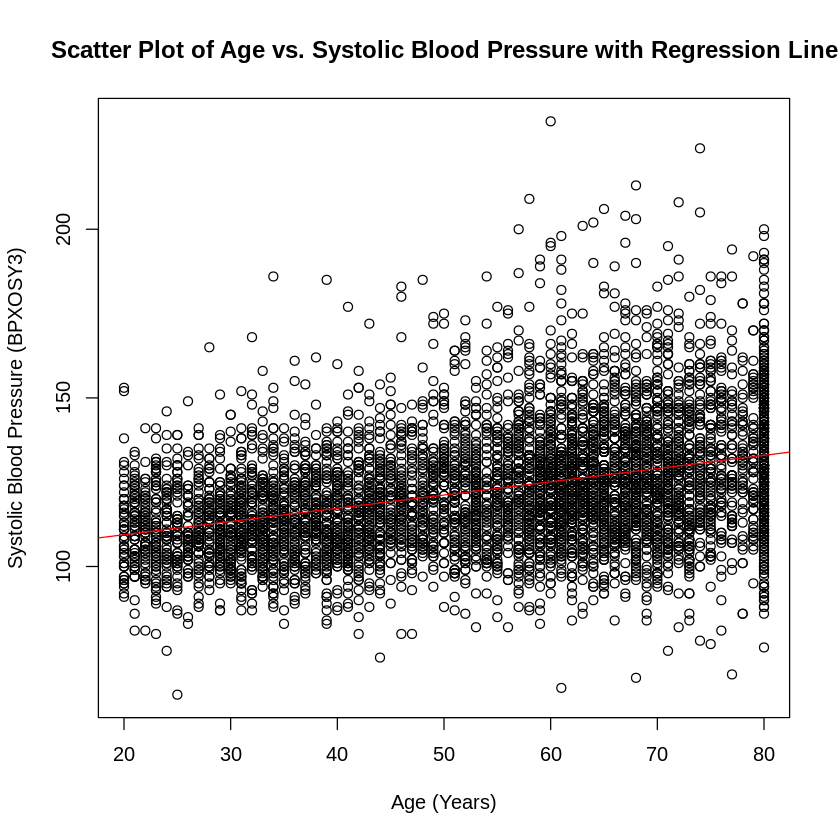

In [ ]:
plot(age_bp_merged_data$RIDAGEYR, age_bp_merged_data$BPXOSY3,
     xlab = "Age (Years)", ylab = "Systolic Blood Pressure (BPXOSY3)",
     main = "Scatter Plot of Age vs. Systolic Blood Pressure with Regression Line")
     abline(bp_age_model, col = "red")

In [ ]:
if (!exists("married_bp_merged_data") || !("DMDMARTZ" %in% names(married_bp_merged_data)) || !("BPXOSY3" %in% names(age_bp_merged_data))) {
  # Merge demo_data_clean (containing RIDAGEYR) with bpxo_data_clean (containing BPXOSY3)
  married_bp_merged_data <- merge(demo_data_clean, bpxo_data_clean, by = "SEQN")
}

In [ ]:
married_bp_model <- lm(BPXOSY3 ~ DMDMARTZ, data = married_bp_merged_data)

In [ ]:
summary_married_bp_model <- summary(married_bp_model)
print(summary_married_bp_model)


Call:
lm(formula = BPXOSY3 ~ DMDMARTZ, data = married_bp_merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-60.472 -12.863  -2.472   9.528 109.333 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 123.05824    0.29025 423.972   <2e-16 ***
DMDMARTZ     -0.19547    0.09452  -2.068   0.0387 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.37 on 5837 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0007322,	Adjusted R-squared:  0.000561 
F-statistic: 4.277 on 1 and 5837 DF,  p-value: 0.03868



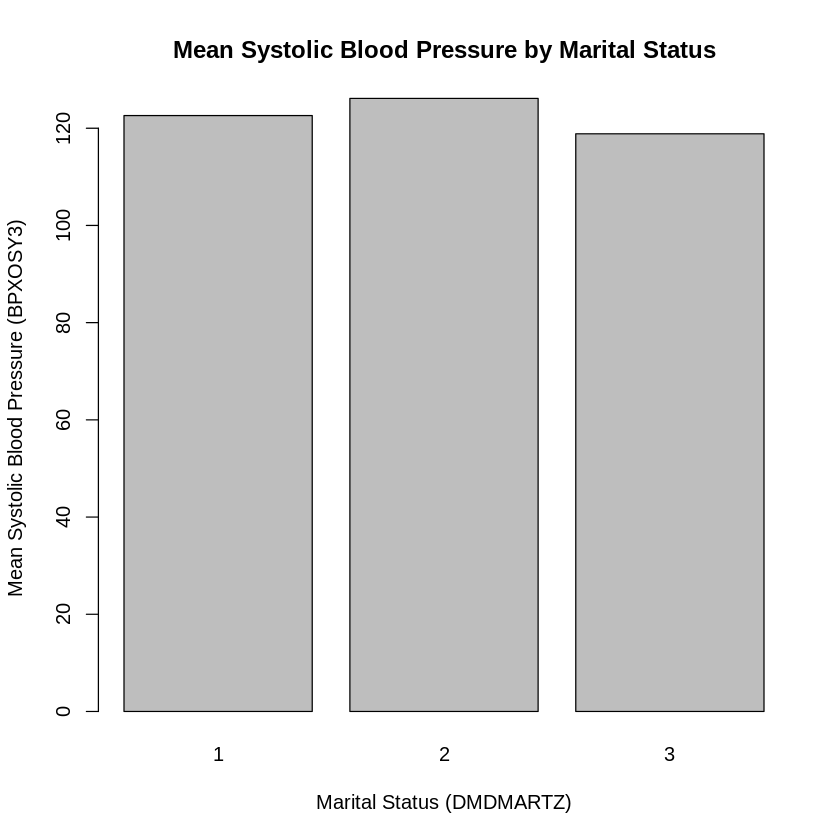

In [ ]:
barplot(mean_bp_by_marital_status$BPXOSY3,
        names.arg = mean_bp_by_marital_status$DMDMARTZ,
        xlab = "Marital Status (DMDMARTZ)", ylab = "Mean Systolic Blood Pressure (BPXOSY3)",
        main = "Mean Systolic Blood Pressure by Marital Status")

Based on the dataset provided, increased age correlates with increased blood pressure. As seen with the scatterplot, blood pressure average increases with age. When comparing marital status correlation, it seems that unmarried individuals have a lower mean blood pressure compared to other groups. However, group 2 which are divorced, widowed or seperated, have a higher mean blood pressure.

QUESTION 4
---
Is there a correlation between self-reported weight and minutes of sedentary behavior?"


DATA

WHD020 - Self reported weight
| Code | Descript | Count |
|---|---|---|
|63 to 530| range of values| 8358 |

PAD680 - sedentary behavior time
| Code | Descript | Count |
|---|---|---|
|0 to 1380| range of values| 8065 |

In [ ]:
weight_sedentary_data <- merge( paq_data_clean , whq_data_clean, by = "SEQN")

In [ ]:
weight_sedentary_model <- lm(WHD020 ~ PAD680, data = weight_sedentary_data)

In [ ]:
summary_weight_sed_model <- summary(weight_sedentary_model)
print(summary_weight_sed_model)


Call:
lm(formula = WHD020 ~ PAD680, data = weight_sedentary_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-116.08  -33.40   -6.15   25.12  338.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.677e+02  1.065e+00  157.50   <2e-16 ***
PAD680      3.585e-02  2.546e-03   14.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.56 on 7952 degrees of freedom
Multiple R-squared:  0.02433,	Adjusted R-squared:  0.0242 
F-statistic: 198.3 on 1 and 7952 DF,  p-value: < 2.2e-16



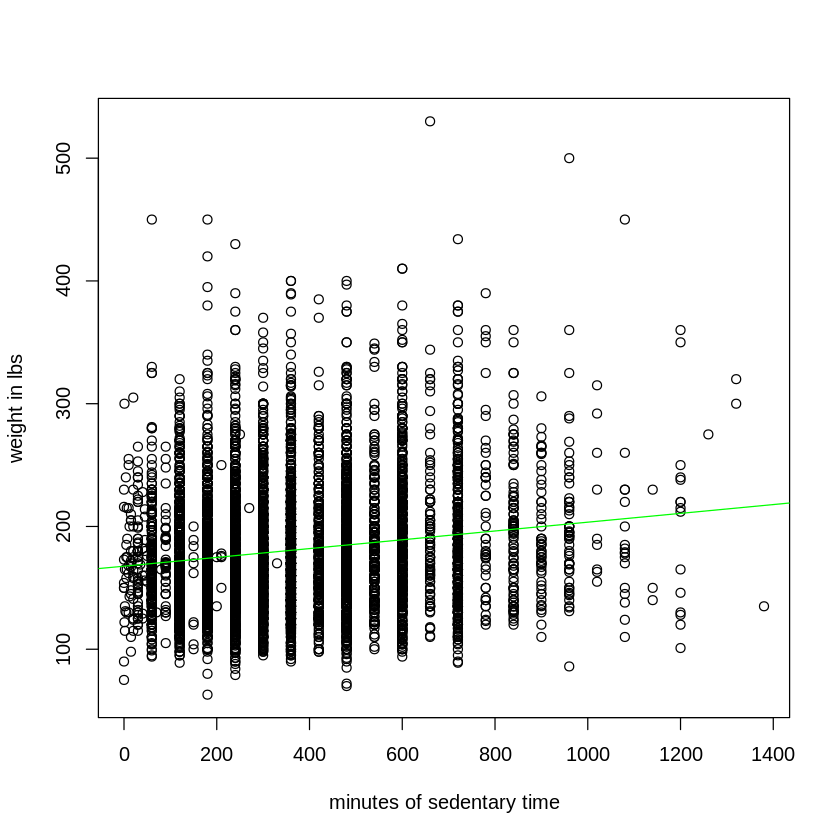

In [ ]:
plot( weight_sedentary_data$PAD680, weight_sedentary_data$WHD020,
 xlab = "minutes of sedentary time", ylab = "weight in lbs"
  )
  abline(weight_sedentary_model, col = "green")

There is a correlation between weight and sedentary time. As sedentary time increases, the average weight also increases. This can be seen the scatter plot above. Correlation is also proven by a strong F statistic of 198.3 and a p value of 2.2e-16.

QUESTION 5
---
Is there a correlation with age and marital status?


Data

RIDAGEYR - Age

| Code |  Value | Count |
|---|---|---|
| 0 - 79| ages between 0 to 79 | 11408 |
| 80 | individuals of 80 or older | 525 |

DMDMARTZ - marital stat
| Code | Descript | Count |
|---|---|---|
|1| Married/living with partner | 4136 |
|2| Widow/Divorce/Seperated|2022|
|3|Never Married|1625|

In [ ]:
age_mar_merged_data <- merge(demo_data_clean, demo_data_clean, by = "SEQN")

In [ ]:
age_mar_model <- lm(RIDAGEYR ~ DMDMARTZ, data = demo_data_clean)

In [ ]:
summary_age_mar_model <- summary(age_mar_model)
print(summary_age_mar_model)


Call:
lm(formula = RIDAGEYR ~ DMDMARTZ, data = demo_data_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.868 -15.232   3.132  14.450  57.317 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 54.18632    0.22859 237.045  < 2e-16 ***
DMDMARTZ    -0.31821    0.06392  -4.978 6.55e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.49 on 7779 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.003176,	Adjusted R-squared:  0.003048 
F-statistic: 24.79 on 1 and 7779 DF,  p-value: 6.546e-07



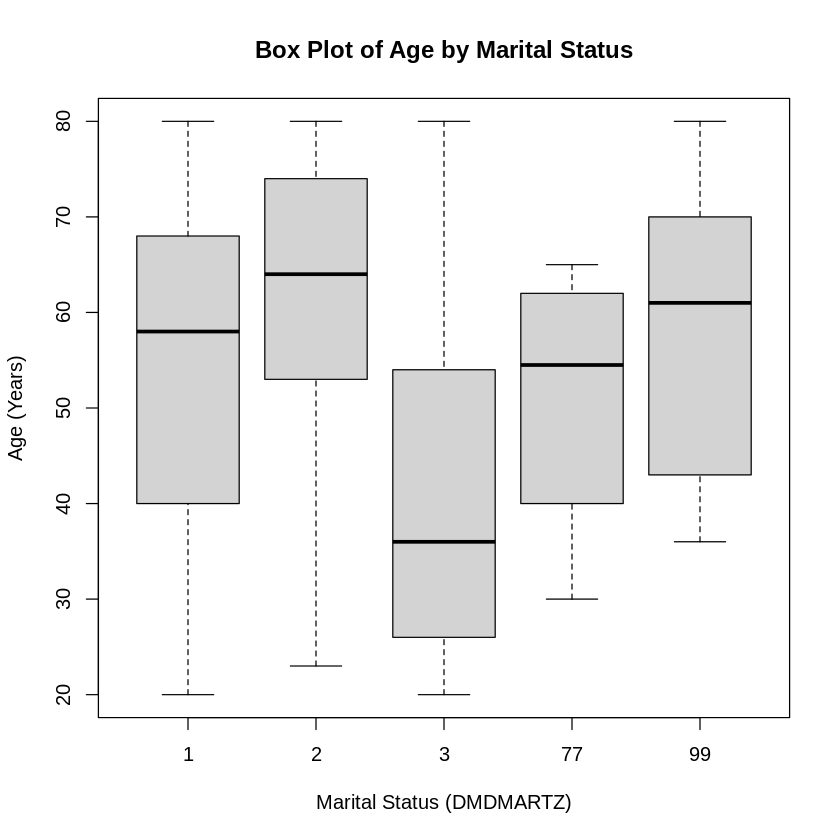

In [ ]:
boxplot(RIDAGEYR ~ DMDMARTZ, data = demo_data_clean,
        xlab = "Marital Status (DMDMARTZ)", ylab = "Age (Years)",
        main = "Box Plot of Age by Marital Status")

PLACEHOLDER WHERE CHIIKAWA LEFT OFF

Review link for assignment and cross compare routes for t test
What to do next: https://github.com/hantswilliams/HHA-507-2025/blob/main/Module5_inferential/r/t-test.r